<img src="../imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **Redes neuronales 5**


## **Funciones de pérdida**

las funciones de pérdida juegan un papel crucial, ya que miden la discrepancia entre las predicciones del modelo y los valores reales de los datos. Elegir una función de pérdida adecuada es fundamental para guiar al modelo durante el proceso de aprendizaje. Existen varias funciones de pérdida (*loss*) que se usan comúnmente en redes.

#### **MSE** 

Mean Squared Error, calcula el promedio de los cuadrados de los errores entre las predicciones y los valores reales. Su formulación es:

$$ \text{MSE} = \frac{\sum_{i=1}^{m} (\hat{y}_i - y_i)^2}{m}  $$


#### **Entropía cruzada**

**Entropía cruzada binaria** o **Binary Cross Entropy**. Mide el desempeño de un modelo de clasificación cuyo output es un valor de probabilidad entre 0 y 1. Es ideal para problemas de clasificación binaria.

$$ \text{BCE} = - \sum_{i=1}^{m} y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i) $$

**Entropía cruzada categórica** o **Categorical Cross Entropy**. Es una extensión de la entropía cruzada binaria para problemas de clasificación con más de dos clases. Requiere que las etiquetas sean codificadas en **one-hot**.

$$ \text{CE} = - \sum_{c=1}^{C} y_c log(\hat{y}_c)$$

#### **Divergencia de Kullback-Leibler**

Mide cuánto se diferencia una distribución de probabilidad de otra. Se utiliza en problemas donde se quiere que las predicciones se acerquen a una distribución de probabilidad específica.

$$ \text{KL} = \sum_{i=1}^{m} p(x_i) log(\frac{p(x_i)}{q(x_i)}) $$


## **Progreso de la función de pérdida**

El progreso de la función de pérdida durante el entrenamiento de una red neuronal ofrece una visión valiosa del proceso de aprendizaje del modelo. Monitorear este progreso es fundamental por varias razones:

1. **Diagnóstico de Aprendizaje**
Convergencia: Una disminución constante en la función de pérdida indica que el modelo está aprendiendo y mejorando su capacidad de hacer predicciones precisas. Si la función de pérdida converge hacia un valor bajo, sugiere que el modelo está ajustándose bien a los datos de entrenamiento.
Divergencia: Por otro lado, si la función de pérdida aumenta o fluctúa ampliamente, puede ser una señal de que el modelo no está aprendiendo correctamente. Esto podría deberse a un tamaño de paso de aprendizaje (learning rate) demasiado alto, problemas en la preparación de los datos, o una arquitectura de modelo inapropiada.

2. **Detección de Sobreajuste y Subajuste**
Sobreajuste (Overfitting): Ocurre cuando el modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido y las anomalías, lo que resulta en un rendimiento pobre en datos no vistos (datos de validación o prueba). Si la pérdida de entrenamiento disminuye mientras que la pérdida de validación aumenta, es una clara indicación de sobreajuste. Subajuste (Underfitting): Se da cuando el modelo no puede capturar la estructura subyacente de los datos, resultando en una mala actuación tanto en el conjunto de entrenamiento como en el de validación. Esto puede ser indicativo de un modelo demasiado simple, una regularización excesiva, o un entrenamiento insuficiente.

<div align="center">
    <img src="imgs/overfitting.png" width="500px">
</div>


3. **Ajuste de Hiperparámetros**
La observación del progreso de la función de pérdida ayuda a ajustar los hiperparámetros del modelo, como la tasa de aprendizaje, el tamaño del lote (batch size), o la cantidad de épocas de entrenamiento. Encontrar el equilibrio correcto de estos hiperparámetros es crucial para optimizar el rendimiento del modelo.


4. **Selección de Modelos**
Comparar el progreso de la función de pérdida entre diferentes arquitecturas de modelos o configuraciones de hiperparámetros puede ayudar a seleccionar el mejor modelo para un problema dado. La elección se puede basar en cuál modelo muestra una mejor convergencia y un menor grado de sobreajuste.


5. **Estrategias de Parada Temprana (Early Stopping)**
El monitoreo de la función de pérdida permite implementar estrategias de parada temprana, donde el entrenamiento se detiene cuando la pérdida de validación comienza a aumentar, evitando así el sobreajuste y reduciendo el tiempo de entrenamiento.

<div align="center">
    <img src="imgs/early-stopping.png" width="500px">
</div>

El momento de Nesterov, también conocido como Nesterov Accelerated Gradient (NAG), es una variante refinada del método de optimización conocido como Momentum, diseñado específicamente para acelerar la convergencia de los algoritmos de gradiente en problemas de optimización, incluyendo el entrenamiento de redes neuronales. Mientras que el método de Momentum busca acelerar el gradiente descendente agregando una fracción del vector de actualización previo al vector de actualización actual, el momento de Nesterov ajusta este enfoque para ganar una mayor precisión en la dirección de la actualización.

## **Cálculo del gradiente**

#### **Funcionamiento Básico**

El gradiente descendente básico actualiza los parámetros $\omega$ de un modelo basándose en el gradiente de la función de pérdida $L$ con respecto a esos parámetros, ajustándolos en la dirección que minimiza la pérdida. La fórmula básica de actualización es:

$$
\omega = \omega - \lambda \nabla_\omega L(\omega)
$$

donde $\lambda$ es la tasa de aprendizaje.

#### **Momentum**

El Momentum mejora este proceso añadiendo un componente de "inercia" a las actualizaciones, que ayuda a acelerar el gradiente descendente en la dirección correcta y amortiguar las oscilaciones. Se introduce una variable $v$ (inicializada a $0$) que representa la velocidad de los parámetros, que acumula el gradiente $\nabla_\omega L(\omega)$ en cada paso:

$$
v = \gamma v - \lambda \nabla_\omega L(\omega)
$$
$$
\omega = \omega + v
$$

Aquí, $\gamma$ es el factor de momentum, actúa como una especie de "fricción" al movimiento, y típicamente se establece a un valor cercano a 1 (e.g., 0.9).

#### **Momento de Nesterov**

El momento de Nesterov (Nesterov Accelerated Gradient - NAG) ajusta este proceso anticipándose a la posición futura de los parámetros y calculando el gradiente en esa posición anticipada en lugar de en la posición actual. Esto permite hacer correcciones más informadas y eficientes. La actualización de parámetros en NAG se realiza en dos pasos:

1. Se calcula una "mirada hacia adelante" de los parámetros usando el valor actual de $v$:

$$
\omega_{\text{temp}} = \omega + \gamma v
$$

2. Luego, se utiliza $\omega_{\text{temp}}$ para calcular el gradiente y actualizar $v$ y $\omega$:

$$
v = \gamma v - \lambda \nabla_\omega L(\omega_{\text{temp}})
$$
$$
\omega = \omega + v
$$

El efecto de "mirar hacia adelante" permite a Nesterov corregir su curso más rápidamente que el Momentum tradicional, lo que puede llevar a una convergencia más rápida y estable hacia mínimos de la función de pérdida.

## **Actualización de la tasa de aprendizaje**


#### **Paso de decaimiento**

Reducir la tasa de aprendizaje por algún factor cada pocas épocas. Los valores típicos pueden reducir la velocidad de aprendizaje a la mitad cada 5 épocas, o 0.1 cada 20 épocas. Estos números dependen en gran medida del tipo de problema y del modelo. Una heurística que se puede ver en la práctica es observar el error de validación mientras se entrena con una velocidad de aprendizaje fija, y reducir la velocidad de aprendizaje en una constante (por ejemplo, 0.5) cada vez que el error de validación deje de mejorar.

#### **Decaimiento exponencial**

Se trata de ir rebajando la tasa de aprendizaje de forma exponencial. $\lambda_{0}$ y $k$ son hiperparámetros.

$\lambda = \lambda_0  e^{-kt} $


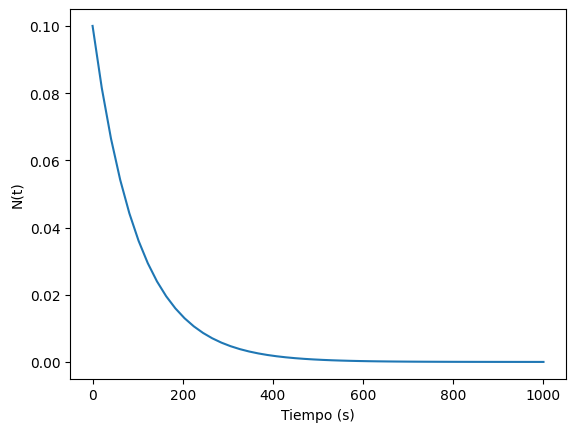

In [7]:
# Decaimiento exponencial

import numpy as np
import matplotlib.pyplot as plt

# Definimos la función
def f(t):
    # Definimos los parámetros
    LAMBDA_0 = 0.1
    K = 0.01
    return LAMBDA_0 * np.exp(-t*K)

# Definimos el tiempo
t = np.linspace(0, 1000)

# Graficamos
plt.plot(t, f(t))
plt.xlabel('Tiempo (s)')
plt.ylabel('N(t)')
plt.show()



#### **Decaimiento 1/t**

$\lambda_{0}$ y $k$ son hiperparámetros.

$\lambda = \frac{\lambda_0}{1 + kt} $


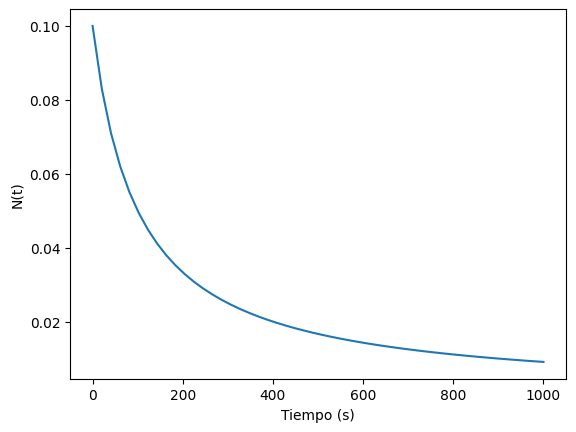

In [8]:
# Decaimiento 1/t

import numpy as np
import matplotlib.pyplot as plt

# Definimos la función
def f(t):
    # Definimos los parámetros
    LAMBDA_0 = 0.1
    K = 0.01
    return LAMBDA_0 / (1 + t*K)

# Definimos el tiempo
t = np.linspace(0, 1000)

# Graficamos
plt.plot(t, f(t))
plt.xlabel('Tiempo (s)')
plt.ylabel('N(t)')
plt.show()

## **Actualización de la tasa de aprendizaje por parámetros**

Estas técnicas ajustan adaptativamente la tasa de aprendizaje para cada parámetro individual del modelo, en lugar de aplicar una tasa de aprendizaje única y fija para todos los parámetros a través de todas las iteraciones del proceso de entrenamiento. El objetivo es mejorar la eficiencia y la eficacia del entrenamiento, permitiendo que el modelo converja más rápidamente a un mínimo de la función de pérdida y potencialmente alcanzar un mejor rendimiento en los datos no vistos.

#### **Adagrad (Adaptive Gradient Algorithm)**

Adagrad es un algoritmo que adapta las tasas de aprendizaje de todos los parámetros ajustando estos de manera que tengan tasas de aprendizaje individuales. La idea clave detrás de Adagrad es acumular los cuadrados de los gradientes pasados en un término de acumulación y luego normalizar la actualización de cada parámetro. Esto permite que parámetros con gradientes frecuentes tengan tasas de aprendizaje menores, mientras que parámetros con gradientes infrecuentes tengan tasas de aprendizaje mayores. Adagrad mejora la eficiencia en problemas con datos esparcidos y es particularmente útil en escenarios donde la distribución de los datos varía mucho.

Dado un parámetro $\omega_i$ del modelo, el gradiente de la función de pérdida $L$ con respecto a $\omega_i$ en el tiempo $t$ es $\nabla_\omega L(\omega_i)_t$. En Adagrad, la actualización del parámetro $\omega_i$ en el tiempo $t+1$ se define como:

$$
\omega_{i, t+1} = \omega_{i, t} - \frac{\lambda}{\sqrt{G_{i, t} + \epsilon}} \cdot \nabla_\omega L(\omega_i)_t
$$

Donde:
- $\lambda$ es la tasa de aprendizaje inicial (un hiperparámetro).
- $G_{i, t}$ es la suma de los cuadrados de los gradientes para el parámetro $\omega_i$ hasta el tiempo $t$, es decir, $G_{i, t} = \sum_{\tau=1}^{t} (\nabla_\omega L(\omega_i)_\tau)^2$.
- $\epsilon$ es un término de suavizado pequeño para evitar la división por cero, típicamente en el orden de $1e-8$.




#### **RMSProp (Root Mean Square Propagation)**


RMSProp modifica Adagrad para mejorar su rendimiento en contextos donde el gradiente decreciente es muy agudo. RMSProp ajusta la tasa de aprendizaje de manera adaptativa para cada parámetro dividiendo la tasa de aprendizaje por una media móvil del cuadrado de los gradientes. A diferencia de Adagrad, RMSProp no acumula todos los cuadrados de gradientes pasados, lo que resuelve el problema de la rápida disminución de la tasa de aprendizaje en Adagrad, haciendo a RMSProp adecuado para entrenar en problemas más difíciles y no estacionarios, como en muchas tareas de redes neuronales recurrentes.

El algoritmo RMSProp (Root Mean Square Propagation) es una técnica de optimización que ajusta la tasa de aprendizaje de manera adaptativa para cada parámetro, tratando de resolver el problema de la disminución rápida de la tasa de aprendizaje que se presenta en Adagrad. RMSProp modifica la acumulación del gradiente cuadrático mediante el uso de una media móvil exponencial, lo que evita el crecimiento sin restricciones del denominador en Adagrad y permite un ajuste más efectivo y sostenido de las tasas de aprendizaje a lo largo del tiempo.

Para un parámetro $\omega$ del modelo, el algoritmo RMSProp actualiza este parámetro en el tiempo $t+1$ usando la siguiente fórmula:

1. **Acumulación del Gradiente Cuadrático:**

$$
v_{t+1} = \beta v_t + (1 - \beta)(\nabla_\omega L(\omega)_t)^2
$$

2. **Actualización del Parámetro:**

$$
\omega_{t+1} = \omega_t - \frac{\lambda}{\sqrt{v_{t+1} + \epsilon}} \nabla_\omega L(\omega)_t
$$

Donde:
- $\lambda$ es la tasa de aprendizaje inicial.
- $v_{t}$ es la media móvil exponencial del cuadrado de los gradientes para el parámetro $\omega$ hasta el tiempo $t$.
- $\beta$ es un hiperparámetro que controla la descomposición de la media móvil exponencial, típicamente con un valor cercano a 0.9.
- $\nabla_\omega L(\omega)_t$ es el gradiente de la función de pérdida $L$ con respecto al parámetro $\omega$ en el tiempo $t$.
- $\epsilon$ es un término de suavizado pequeño para evitar la división por cero, generalmente en el orden de $1e-8$.


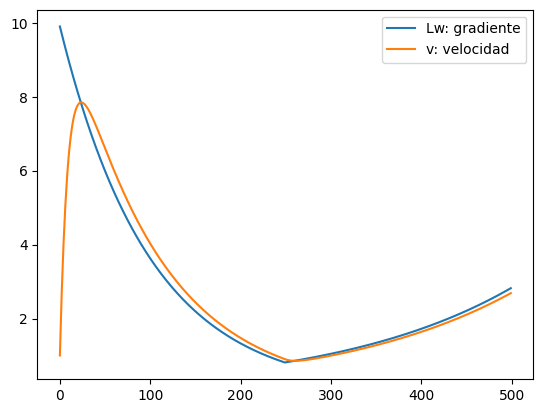

In [20]:
# Imagina que el gradiente empieza muy alto y va disminuyendo con el tiempo. La v comenzará alta pero irá disminuyendo con el tiempo.
Lw = 10
v = 0
beta = 0.9

Lw_list = []
v_list = []
for i in range(500):
    v = 0.9*v + 0.1*Lw
    # Decamiento exponencial de Lw
    
    Lw = 0.99*Lw if i<250 else 1.005*Lw
    
    Lw_list.append(Lw)
    v_list.append(v)

plt.plot(Lw_list, label='Lw: gradiente')
plt.plot(v_list, label='v: velocidad')
plt.legend()
plt.show()


#### **Adam (Adaptive Moment Estimation)**

El algoritmo Adam (Adaptive Moment Estimation) combina las ideas de la adaptación del gradiente cuadrático, similar a RMSProp, con el momentum, para ajustar la tasa de aprendizaje de cada parámetro de manera adaptativa. Adam mantiene estimaciones del primer y segundo momento (es decir, el promedio del gradiente y el promedio del cuadrado del gradiente, respectivamente) para cada parámetro, ajustándose a la magnitud y dirección de los gradientes.

Para un parámetro $\omega$ en el tiempo $t$, las actualizaciones de Adam se realizan de la siguiente manera:

1. **Cálculo de los Momentos:**

   - Primer momento (momentum) del gradiente:
     $$
     m_{t+1} = \beta_1 m_t + (1 - \beta_1) \nabla_\omega L(\omega)_t
     $$

   - Segundo momento (escala del gradiente) del gradiente:
     $$
     v_{t+1} = \beta_2 v_t + (1 - \beta_2) (\nabla_\omega L(\omega)_t)^2
     $$

   Donde $m_t$ y $v_t$ son estimaciones del primer y segundo momento del gradiente, respectivamente; $\beta_1$ y $\beta_2$ son factores de decaimiento exponencial para los momentos estimados.

2. **Corrección de los Momentos:**

   Debido a la inicialización de los momentos a cero, se realiza una corrección de sesgo para ambos momentos:
   - Primer momento corregido:
     $$
     \hat{m}_{t+1} = \frac{m_{t+1}}{1 - \beta_1^{t+1}}
     $$

   - Segundo momento corregido:
     $$
     \hat{v}_{t+1} = \frac{v_{t+1}}{1 - \beta_2^{t+1}}
     $$

3. **Actualización del Parámetro:**

   Finalmente, el parámetro $\omega$ se actualiza como:
   $$
   \omega_{t+1} = \omega_t - \frac{\lambda}{\sqrt{\hat{v}_{t+1}} + \epsilon} \hat{m}_{t+1}
   $$

   Donde:
   - $\lambda$ es la tasa de aprendizaje inicial.
   - $\epsilon$ es un término de suavizado pequeño para evitar la división por cero, típicamente en el orden de $1e-8$.


<br>
<br>
<div align="center">
  <img src="imgs/opt1.gif" width="40%">
  <img src="imgs/opt2.gif" width="40%">
</div>

